In [1]:
# Base library imports
import colorsys
import os
import re

# Module imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Quick pathfix required before loading project resources
try:
    notebook_location
except NameError:
    notebook_location = os.getcwd()
    os.chdir(re.sub(r'(DSC672)[\\/].*', r'\1', notebook_location))

# Project imports (none just yet)

In [2]:
def display_full_df(df):
    """
    Utility function to display a data frame in full
    """
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(df)


def create_hist_agg(prefix, bins):
    """
    Utility function to aggregate histogram data
    """
    result = dict()
    for i in range(bins):
        result['%s%s' % (prefix, i)] = 'sum'
    return result


def create_hue_colors(bins, s=1., v=1.):
    """
    Utility function to create a list of colors in the HSV space stepping the H value
    from zero to one given the number of bins, S-value, and V-value.
    """
    colors = list()
    for i in range(bins):
        rgb_float = colorsys.hsv_to_rgb(float(i * 8)/255., s, v)
        rgb = [0, 0, 0]
        rgb[0] = int(rgb_float[0]*255)
        rgb[1] = int(rgb_float[1]*255)
        rgb[2] = int(rgb_float[2]*255)
        colors.append('#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2]))
    return colors

## Quick Preview of the Training and Testing Data Summaries

In [3]:
data_summary_df = pd.read_csv('temp_data/summary.csv')
display(data_summary_df)

,tile_id,catalog,size,collection,map,tile,x,y,zoom,building_pixels,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31
0,tier1_acc_665946_0,tier1,256,acc,665946,0,261799,253906,19,1515,...,615,457,309,304,177,156,135,155,179,290
1,tier1_acc_665946_100,tier1,256,acc,665946,100,261790,253918,19,165,...,807,627,659,441,185,91,93,94,114,347
2,tier1_acc_665946_101,tier1,256,acc,665946,101,261791,253918,19,12509,...,928,802,748,951,996,306,132,196,89,24
3,tier1_acc_665946_102,tier1,256,acc,665946,102,261792,253918,19,57700,...,4119,2615,2125,945,607,272,71,23,1,0
4,tier1_acc_665946_103,tier1,256,acc,665946,103,261793,253918,19,16260,...,7,11,8,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70444,tier2_nia_b80615_96,tier2,256,nia,b80615,96,265264,242339,19,18657,...,3091,4631,6523,7619,6088,2558,614,109,3,0
70445,tier2_nia_b80615_97,tier2,256,nia,b80615,97,265265,242339,19,12757,...,3158,4831,6469,6260,3957,1963,268,51,14,0
70446,tier2_nia_b80615_98,tier2,256,nia,b80615,98,265266,242339,19,8038,...,2209,2717,3807,5065,3978,2986,854,317,93,104
70447,tier2_nia_b80615_99,tier2,256,nia,b80615,99,265267,242339,19,417,...,165,254,417,803,1218,357,70,49,18,85


In [4]:
test_data_summary_df = pd.read_csv('temp_data/test_summary.csv')
display(test_data_summary_df)

,tile_id,map,map_pixels,r0,r1,r2,r3,r4,r5,r6,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31
0,00022f,00022f,1048576,0,3,27,29,84,345,1242,...,102887,88870,72609,63568,58459,54283,46841,27993,6590,445
1,0002cd,0002cd,1048576,7,124,3127,21482,34212,35141,27828,...,30596,32891,46545,129639,157389,150029,115971,33157,3451,460
2,0008b6,0008b6,1048576,0,0,0,0,0,0,3,...,120992,97833,57726,25525,9830,3696,1727,908,90,9
3,000e6e,000e6e,1048576,0,3,183,6772,4794,4156,4854,...,69190,60533,48475,34889,25192,23858,54492,53347,32013,1585
4,0020ad,0020ad,1048576,0,0,0,0,0,71,3378,...,23678,5981,1977,1196,544,133,185,41,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,ffd0bc,ffd0bc,1048576,60,348,3402,19133,31203,29886,25722,...,92814,38871,28971,18689,12820,10790,10806,6425,5056,1966
11477,ffe6d2,ffe6d2,1048576,0,0,0,0,65,1432,13545,...,79051,33800,8455,980,157,46,20,6,3,0
11478,fff282,fff282,1048576,0,0,0,0,0,0,55,...,7021,1436,276,67,17,2,1,0,0,0
11479,fffd3f,fffd3f,1048576,39,254,3449,41785,70876,64478,47398,...,43564,27568,18294,14478,9384,5917,6489,6276,7397,2535


# Building and Map Pixels: Percentage Building Coverage
The first portion of the exploratory analysis focuses on the percentage of pixels in the training data that are classified as buildings.

## Building and Map Pixels Broken Down by Map

In [5]:
map_summary_df = data_summary_df.groupby(['catalog', 'collection', 'map']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
map_summary_df['percent_building'] = map_summary_df['building_pixels']['sum'].astype(float) / \
    map_summary_df['map_pixels']['sum'].astype(float)
display_full_df(map_summary_df)

tile map_pixels building_pixels percent_building
                          count        sum             sum                 
catalog collection map                                                     
tier1   acc        665946   459   25838782         7066809         0.273496
                   a42435   291   16200077         6329031         0.390679
                   ca041a   441   24056291         8156021         0.339039
                   d41d81   428   23610745        10875154         0.460602
        dar        0a4c40  1657  101140143        19559734         0.193392
                   353093   662   38507611         8377766         0.217561
                   a017f9   592   34467491         9617483         0.279031
                   b15fce   720   43303361        20590972         0.475505
        kam        4e7c7f   239   12890311         2435015         0.188903
        mon        207cc7    99    4742924         1609226         0.339290
                   401175   143    7488732         2690281         0.359244
                   493701   116    5964151         1506559         0.252602
                   f15272    86    4004976         2245288         0.560625
        nia        825a50   160    8157085          359385         0.044058
        ptn        abe1a3   276   15105622         4444171         0.294206
                   f49f31   124    6156011         2195143         0.356585
        znz        06f252  1681  102699331         1267819         0.012345
                   076995  1325   84835924          929410         0.010955
                   33cae6  1299   81371902         7907077         0.097172
                   3f8360  1435   89813221         2162538         0.024078
                   425403  1640  102885977          166288         0.001616
                   75cdfa  1681  102861281          469869         0.004568
                   9b8638  1263   78742652         1844803         0.023428
                   aee7fd  1681  102910661          465834         0.004527
                   bc32f1  1640  102746265           34815         0.000339
                   bd5c14  1600  102887343         1361963         0.013237
                   c7415c  1189   73870096         1274919         0.017259
                   e52478   680   41684275           60329         0.001447
tier2   dar        0ccd08  1144   68979346        25533363         0.370160
                   109874  2513  155330432        32815590         0.211263
                   1d8af6  2280  142789252        50524661         0.353841
                   219237  2364  145638264        20305897         0.139427
                   24a7d8  1024   61982519         8079757         0.130355
                   385a0e  2266  142173981        55877484         0.393022
                   3b3e53   348   18578793         2756632         0.148375
                   541eff   650   38929912         7457565         0.191564
                   56e713  2350  145272660        35150344         0.241961
                   5fadcd  2266  141819790        38153467         0.269028
                   5fe6fb  2016  125651842        28004246         0.222872
                   63c3f9  2116  132641204        24618540         0.185603
                   759e34   750   44732079         5866049         0.131137
                   82a1f3   275   14837685         4436392         0.298995
                   8737a8  1469   89620909        29972180         0.334433
                   8d7dd4   334   18850599         5872500         0.311529
                   94a004   327   12117102         1206151         0.099541
                   9870ba   461   27354168         6389194         0.233573
                   ab32c9  1266   76429079        27035906         0.353738
                   b8faa3  1474   91056394         8532592         0.093707
                   c533fa  1274   77608864        15469713         0.199329
                   ca3445   480   27747726         7424762         0.267581

## Building and Map Pixels Broken Down by Collection

In [6]:
collection_summary_df = data_summary_df.groupby(['catalog', 'collection']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
collection_summary_df['percent_building'] = collection_summary_df['building_pixels']['sum'].astype(float) / \
    collection_summary_df['map_pixels']['sum'].astype(float)
display_full_df(collection_summary_df)

tile  map_pixels building_pixels percent_building
                    count         sum             sum                 
catalog collection                                                    
tier1   acc          1619    89705895        32427015         0.361481
        dar          3631   217418606        58145955         0.267438
        kam           239    12890311         2435015         0.188903
        mon           444    22200783         8051354         0.362661
        nia           160     8157085          359385         0.044058
        ptn           400    21261633         6639314         0.312267
        znz         17114  1067308928        17945664         0.016814
tier2   dar         40581  2479420709       617713815         0.249136
        gao          2364   143579454        14732732         0.102610
        kin           229    11483946         1908908         0.166224
        mah          3133   186578068        16100709         0.086295
        nia           535    29321417         4730351         0.161328

## Building and Map Pixels Broken Down by Catalog

In [7]:
catalog_summary_df = data_summary_df.groupby(['catalog']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
catalog_summary_df['percent_building'] = catalog_summary_df['building_pixels']['sum'].astype(float) / \
    catalog_summary_df['map_pixels']['sum'].astype(float)
display_full_df(catalog_summary_df)

,tile,map_pixels,building_pixels,percent_building
,count,sum,sum,
catalog,,,,
tier1,23607,1438943241,126003702,0.087567
tier2,46842,2850383594,655186515,0.229859


## Building and Map Pixels For Entire Training Data Set

In [8]:
train_summary_df = data_summary_df.agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
train_summary_df['percent_building'] = train_summary_df['building_pixels']['sum'].astype(float) / \
    train_summary_df['map_pixels']['sum'].astype(float)
display(train_summary_df)

,tile,map_pixels,building_pixels,percent_building
count,70449.0,NaN,NaN,0.182124
sum,NaN,4.289327e+09,781190217.0,0.182124


# Pixel Color-Component Analysis

In [9]:
tier_r_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('r', 32))
tier_g_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('g', 32))
tier_b_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('b', 32))
tier_h_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('h', 32))
tier_s_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('s', 32))
tier_v_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('v', 32))

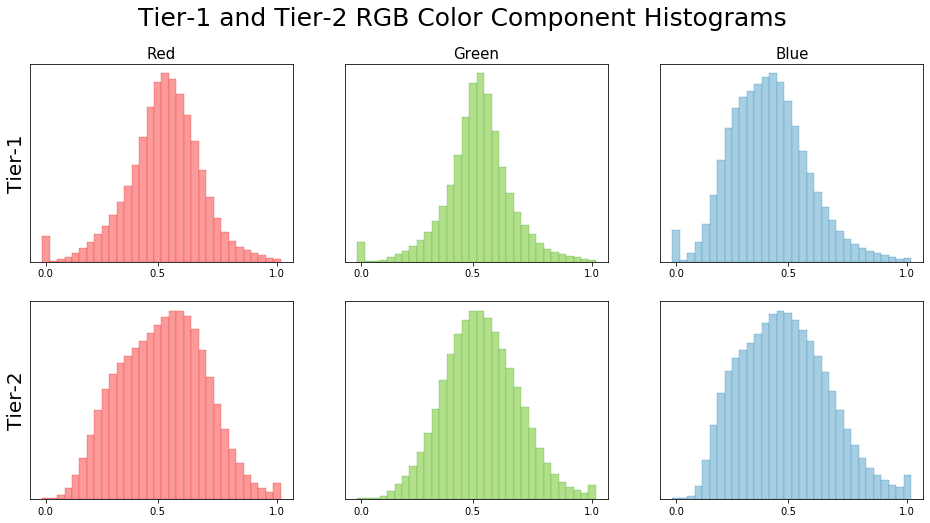

In [10]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].set_title('Red', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=tier_r_histogram.iloc[0].values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[0, 1].set_title('Green', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=tier_g_histogram.iloc[0].values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[0, 2].set_title('Blue', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=tier_b_histogram.iloc[0].values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_r_histogram.iloc[1].values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=tier_g_histogram.iloc[1].values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=tier_b_histogram.iloc[1].values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 RGB Color Component Histograms', fontsize=25)
plt.show()

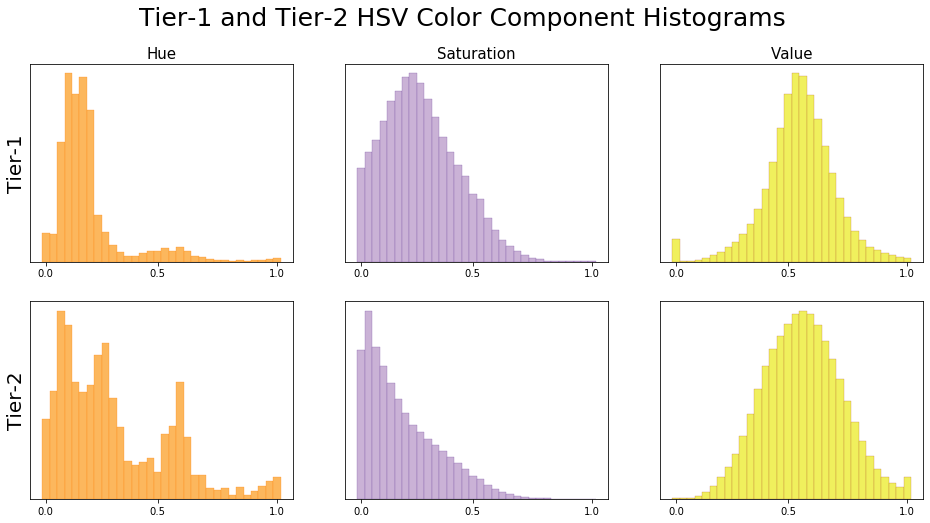

In [11]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].set_title('Hue', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[0, 1].set_title('Saturation', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=tier_s_histogram.iloc[0].values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[0, 2].set_title('Value', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=tier_v_histogram.iloc[0].values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=tier_s_histogram.iloc[1].values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=tier_v_histogram.iloc[1].values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 HSV Color Component Histograms', fontsize=25)
plt.show()

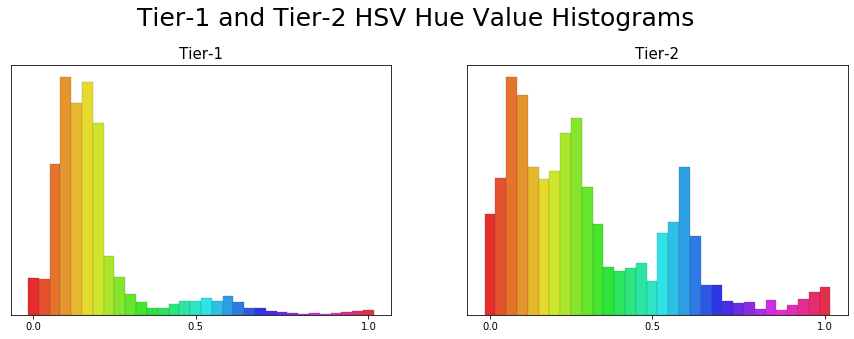

In [12]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].set_title('Tier-1', fontsize=15)
axs[0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1].set_title('Tier-2', fontsize=15)
axs[1].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.82)
plt.show()

In [13]:
train_r_histogram = data_summary_df.agg(create_hist_agg('r', 32))
train_g_histogram = data_summary_df.agg(create_hist_agg('g', 32))
train_b_histogram = data_summary_df.agg(create_hist_agg('b', 32))
train_h_histogram = data_summary_df.agg(create_hist_agg('h', 32))
train_s_histogram = data_summary_df.agg(create_hist_agg('s', 32))
train_v_histogram = data_summary_df.agg(create_hist_agg('v', 32))

In [14]:
test_r_histogram = test_data_summary_df.agg(create_hist_agg('r', 32))
test_g_histogram = test_data_summary_df.agg(create_hist_agg('g', 32))
test_b_histogram = test_data_summary_df.agg(create_hist_agg('b', 32))
test_h_histogram = test_data_summary_df.agg(create_hist_agg('h', 32))
test_s_histogram = test_data_summary_df.agg(create_hist_agg('s', 32))
test_v_histogram = test_data_summary_df.agg(create_hist_agg('v', 32))

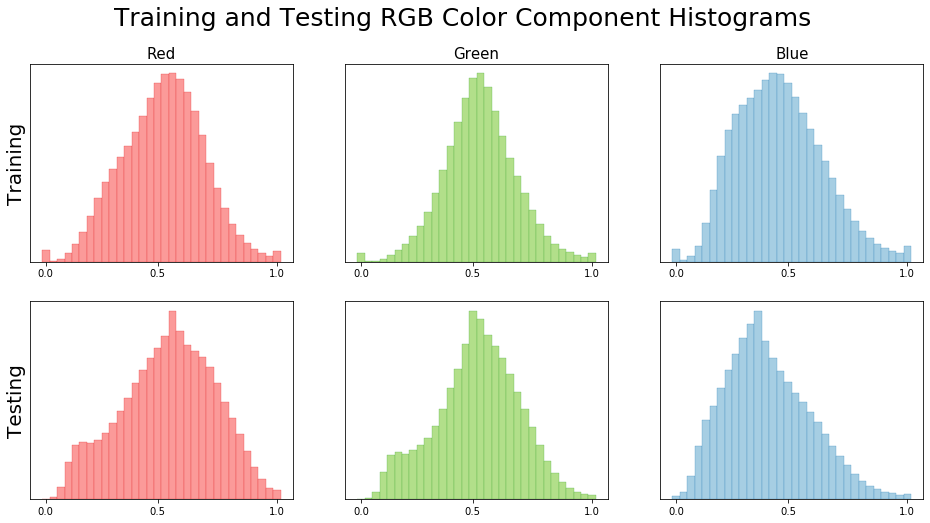

In [15]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Training', fontsize=20)
axs[0, 0].set_title('Red', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=train_r_histogram.values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[0, 1].set_title('Green', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=train_g_histogram.values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[0, 2].set_title('Blue', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=train_b_histogram.values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
axs[1, 0].set_ylabel('Testing', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=test_r_histogram.values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_g_histogram.values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=test_b_histogram.values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Testing RGB Color Component Histograms', fontsize=25)
plt.show()

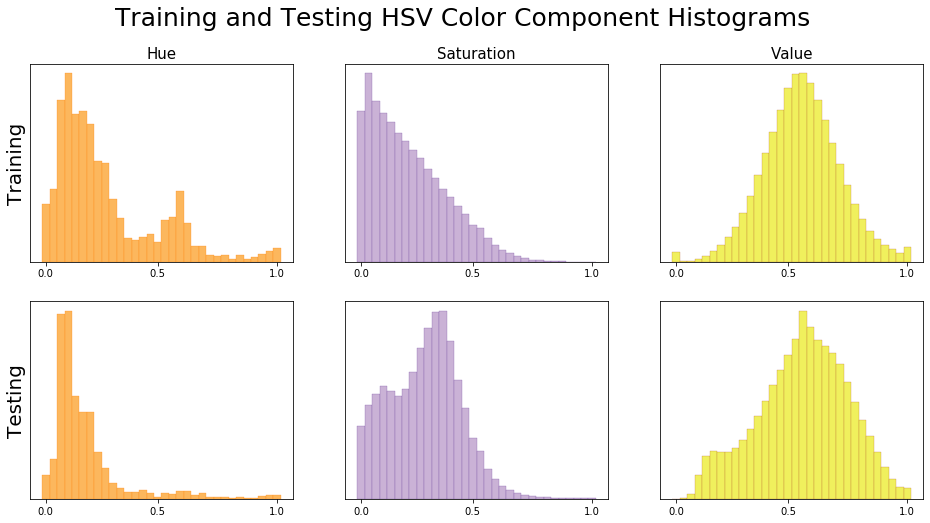

In [16]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Training', fontsize=20)
axs[0, 0].set_title('Hue', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=train_h_histogram.values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[0, 1].set_title('Saturation', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=train_s_histogram.values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[0, 2].set_title('Value', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=train_v_histogram.values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
axs[1, 0].set_ylabel('Testing', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_s_histogram.values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=test_v_histogram.values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Testing HSV Color Component Histograms', fontsize=25)
plt.show()

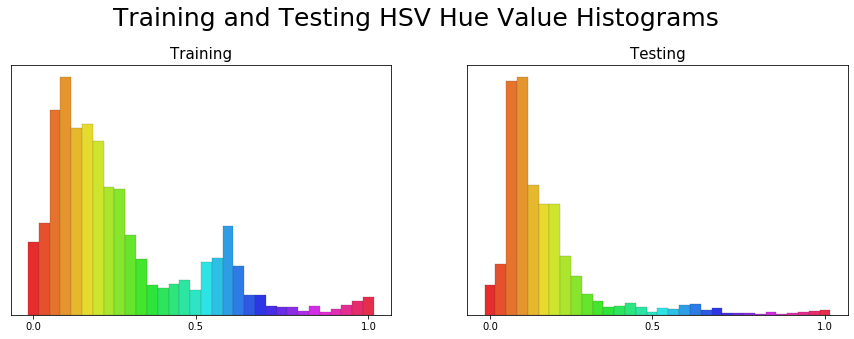

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].set_title('Training', fontsize=15)
axs[0].bar(x=range(0,32), height=train_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1].set_title('Testing', fontsize=15)
axs[1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Testing HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.82)
plt.show()

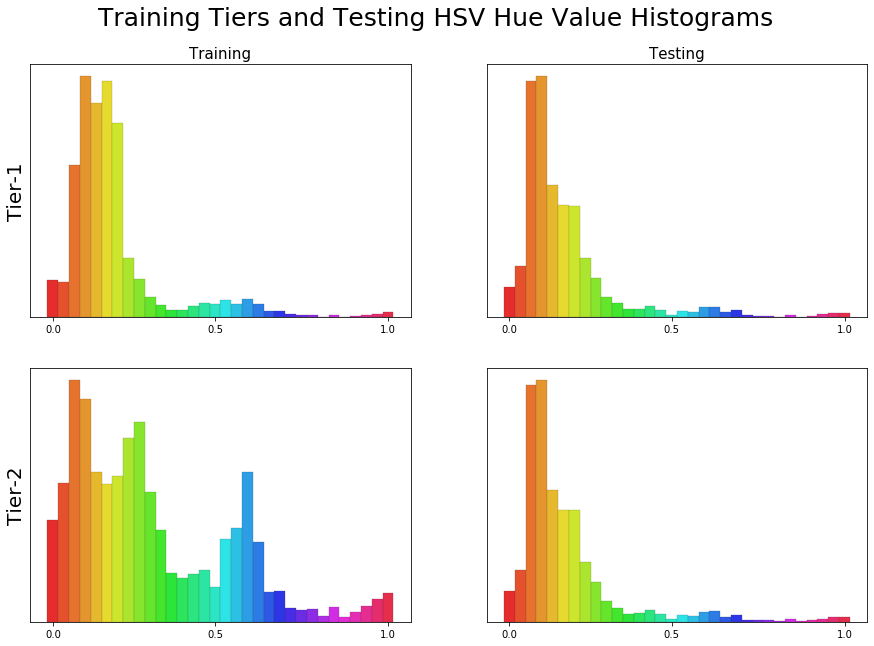

In [30]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
axs[0, 0].set_title('Training', fontsize=15)
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[0, 1].set_title('Testing', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training Tiers and Testing HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.90)
plt.show()